<a href="https://colab.research.google.com/github/minso00/KFU_Project/blob/main/E_commerce_Sales_Analysis_(Superstore).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ продаж в интернет-магазине (Superstore)

Цель проекта — исследовать данные, выявить тренды и сделать выводы.

In [9]:
from google.colab import files
file_upload = files.upload()


Saving Sample - Superstore.csv to Sample - Superstore (1).csv


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Sample - Superstore.csv', encoding='cp1252')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**Общая информация о данных **

In [17]:
# Колонки и типы данных
df.info()

# Размер таблицы
print("Строк:", df.shape[0], "Столбцов:", df.shape[1])

# Пропущенные значения
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

**Очистка и подготовка данных**

In [18]:
# Преобразуем даты
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Добавим колонку "Месяц"
df['Month'] = df['Order Date'].dt.to_period('M')

# Удалим дубликаты, если есть
df.drop_duplicates(inplace=True)

In [20]:
# Убираем лишние символы, если они есть, и превращаем в числа
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

**Базовый анализ(EDA)**

In [25]:
# Преобразуем дату заказа в datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Создаём столбец с месяцами в виде строки: '2023-01', '2023-02' и т.д.
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)

# Удаляем символы валюты и пробелы, если есть, и превращаем в числа
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

In [26]:
monthly = df.groupby('Month')[['Sales', 'Profit']].sum().reset_index()

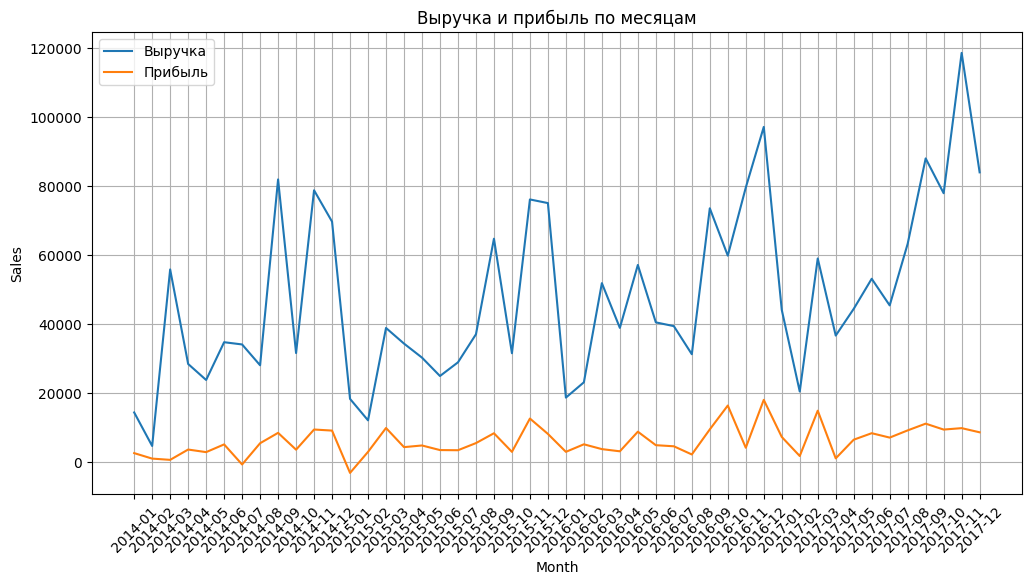

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly, x='Month', y='Sales', label='Выручка')
sns.lineplot(data=monthly, x='Month', y='Profit', label='Прибыль')
plt.title('Выручка и прибыль по месяцам')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Топ-10 товаров по продажам**

/tmp/ipython-input-28-3100762609.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='Blues_r')


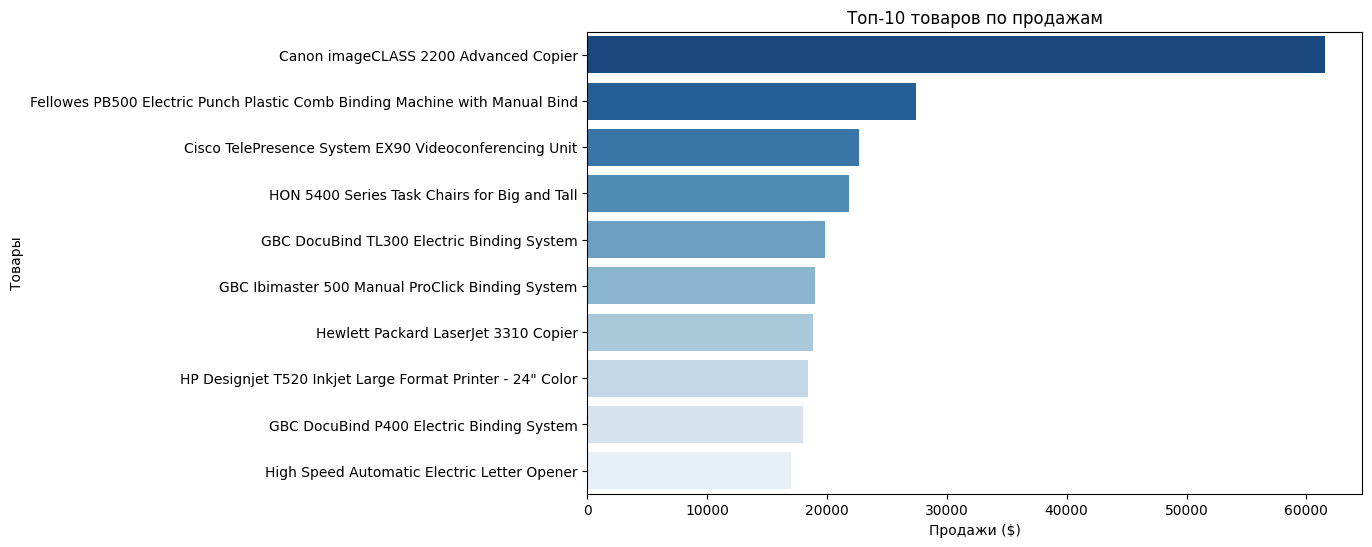

In [28]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='Blues_r')
plt.title('Топ-10 товаров по продажам')
plt.xlabel('Продажи ($)')
plt.ylabel('Товары')
plt.show()

**Продажи по категориям**

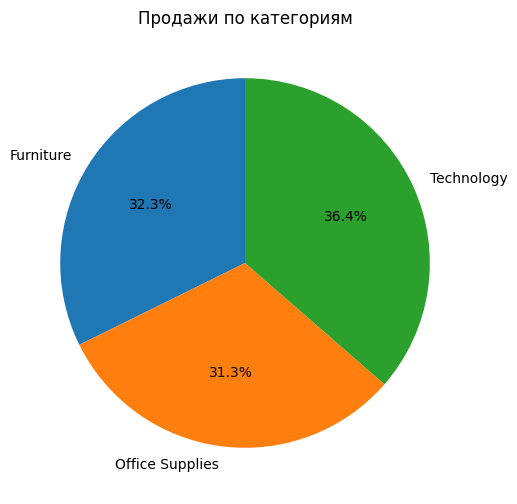

In [29]:
category_sales = df.groupby('Category')['Sales'].sum()

category_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), startangle=90)
plt.title('Продажи по категориям')
plt.ylabel('')
plt.show()

**Прибыль по сегментам клиентов**

/tmp/ipython-input-30-244173314.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_profit.values, y=segment_profit.index, palette='pastel')


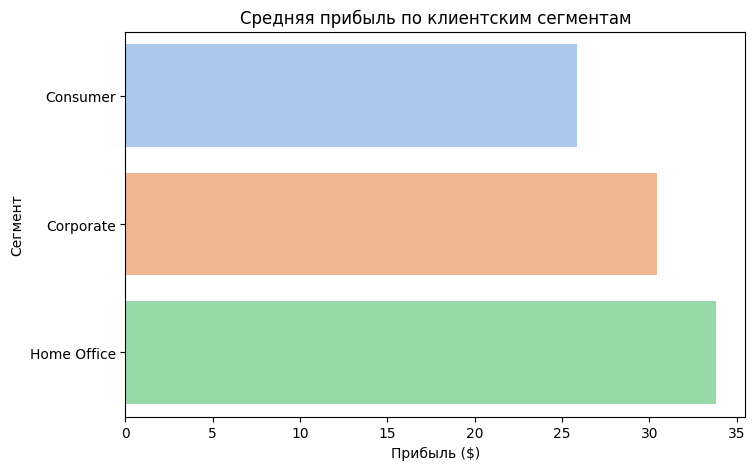

In [30]:
segment_profit = df.groupby('Segment')['Profit'].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=segment_profit.values, y=segment_profit.index, palette='pastel')
plt.title('Средняя прибыль по клиентским сегментам')
plt.xlabel('Прибыль ($)')
plt.ylabel('Сегмент')
plt.show()

**География: Топ-10 городов по продажам**

/tmp/ipython-input-31-816994110.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')


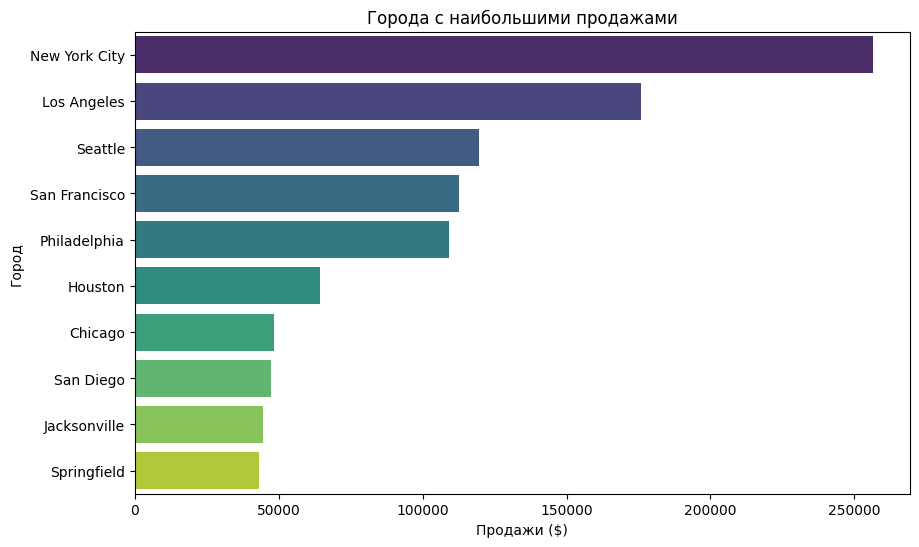

In [31]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Города с наибольшими продажами')
plt.xlabel('Продажи ($)')
plt.ylabel('Город')
plt.show()

**Корреляция между скидкой, продажами и прибылью**

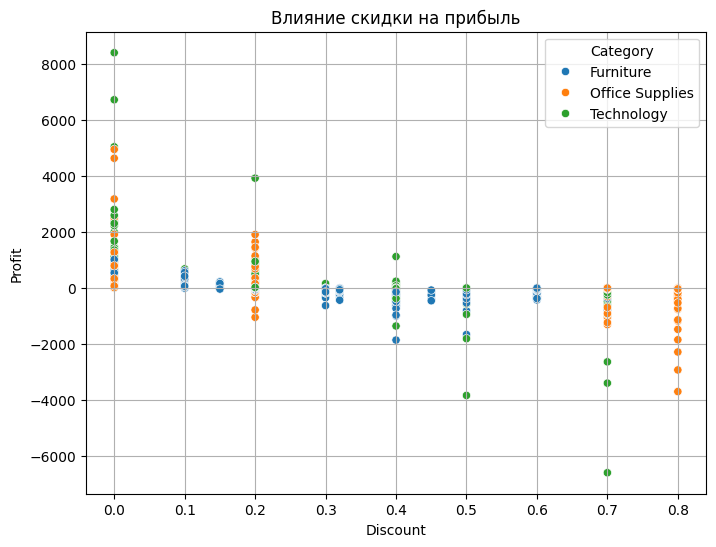

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Влияние скидки на прибыль')
plt.grid(True)
plt.show()

**ВЫВОДЫ:**
- Выручка и прибыль резко возрастают в ноябре — возможные сезонные акции.
- Наибольшую прибыль приносит категория "Technology".
- Некоторые товары с высокими продажами — убыточны: нужно анализировать скидки.
- Большие скидки часто снижают прибыль — стоит оптимизировать маркетинг.
- Топовые города — ключевые рынки для масштабирования.

In [33]:
plt.savefig('/content/revenue_by_month.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>